In [7]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

In [8]:
# input file formats
microstate_pairs_fmt = './microstate_pairs/{0}_microstate_pairs.csv'
mol_numbers = ["SM{:02d}".format(x) for x in range(1,25)]
columns=["Molecule", "Protonated", "Deprotonated"]


In [9]:
%matplotlib inline

In [12]:
def get_graph(csvfile):
    """Takes a microstate pairs csv file and returns directed Graph
    """
    # The atoms        
    nodes: List[Dict[str,str]] = list()
    # The bonds
    edges: List[Dict[str,str]]= list()        
    mol_frame = pd.read_csv(csvfile)
    mol_frame.columns= ["Protonated", "Deprotonated"]
    from_list = list(mol_frame["Deprotonated"])
    to_list = list(mol_frame["Protonated"])
    G = nx.DiGraph()
    G.add_edges_from(zip(from_list,to_list))
    pos = nx.spring_layout(G)
        
    return G, pos

def make_graph_plot(molname):
    """
    Plot the state pair graph and return the paths
    """
    G, pos = get_graph(microstate_pairs_fmt.format(molname))
    plt.figure(figsize=(10,10))
    nx.draw_networkx_edges(G, pos,)
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='#E5e5e5', alpha=0.3, node_shape='s')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    for node1 in G.nodes:
        for node2 in G.nodes:
            if node1 != node2:
            
                try:                
                    paths = [p for p in nx.shortest_path(G, node1, node2)]                    
                except nx.NetworkXNoPath:
                    pass
                
    return G
  


C:\Users\rustenba\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


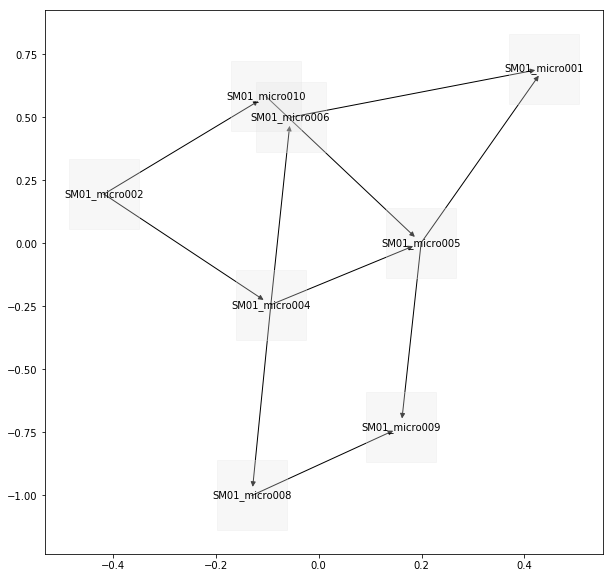

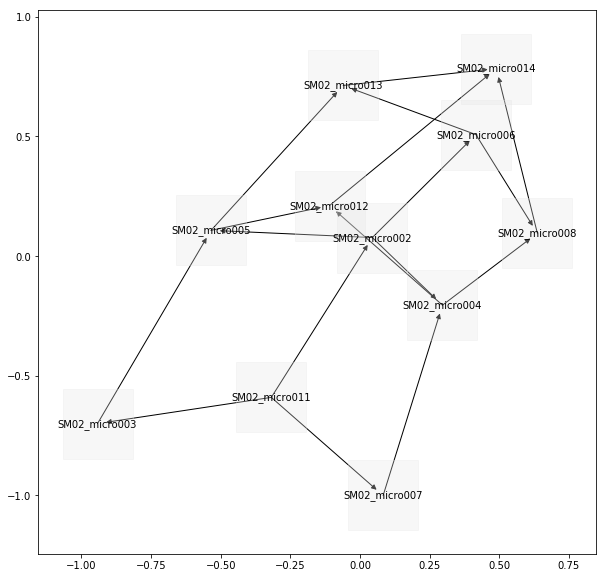

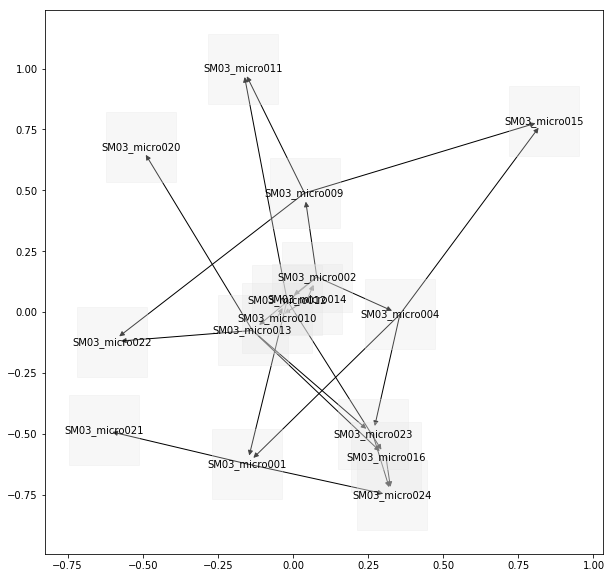

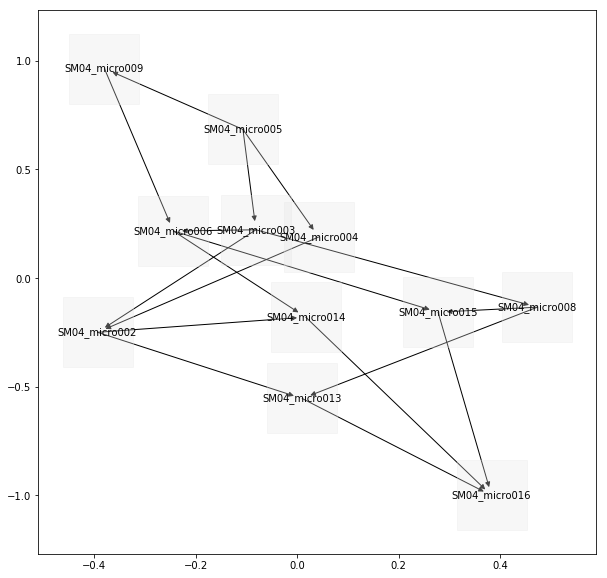

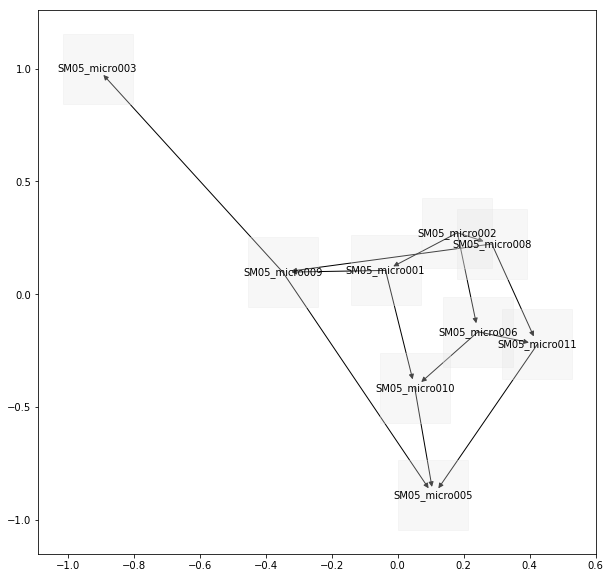

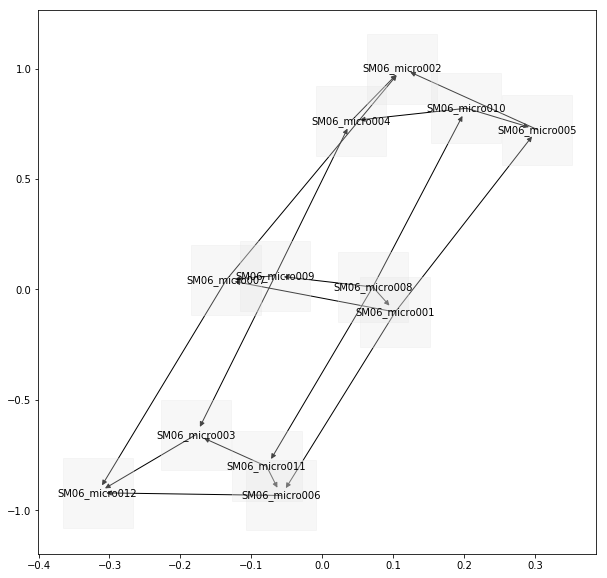

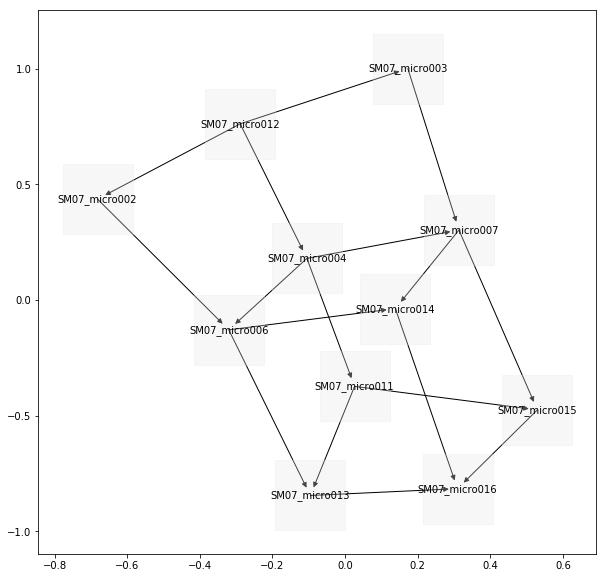

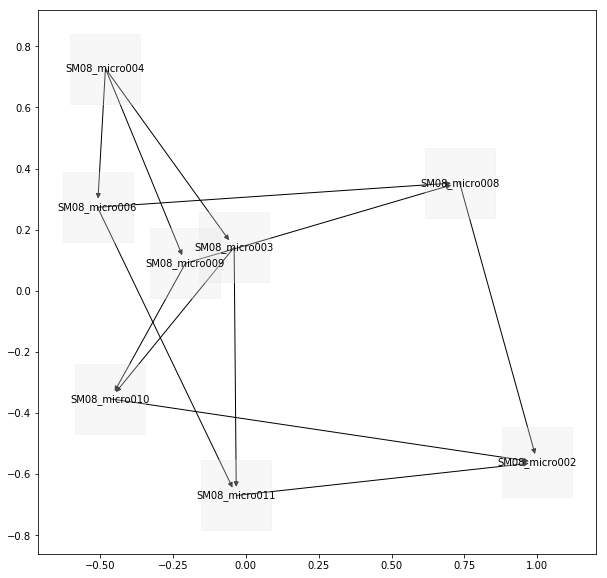

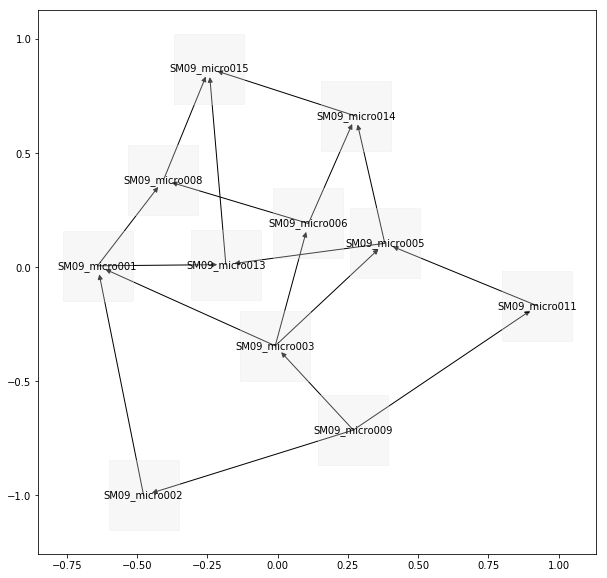

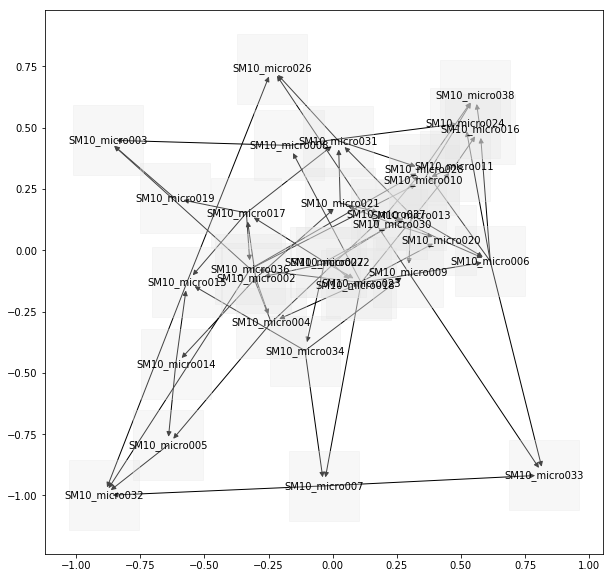

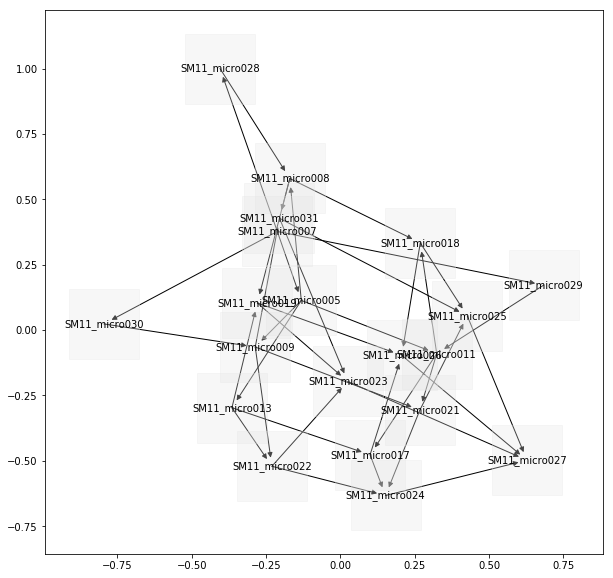

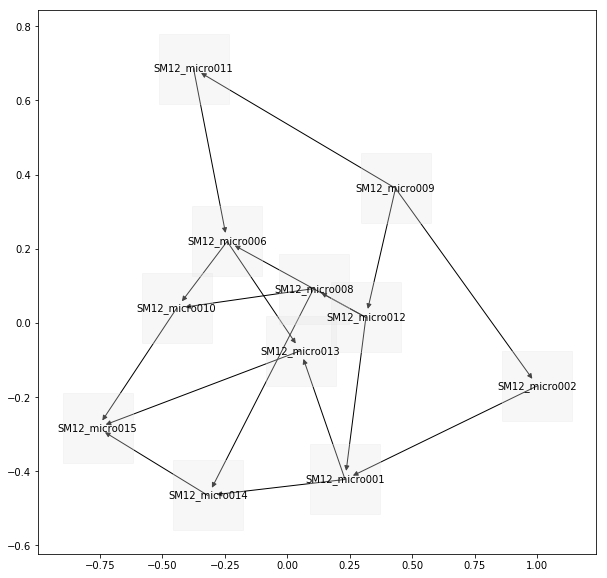

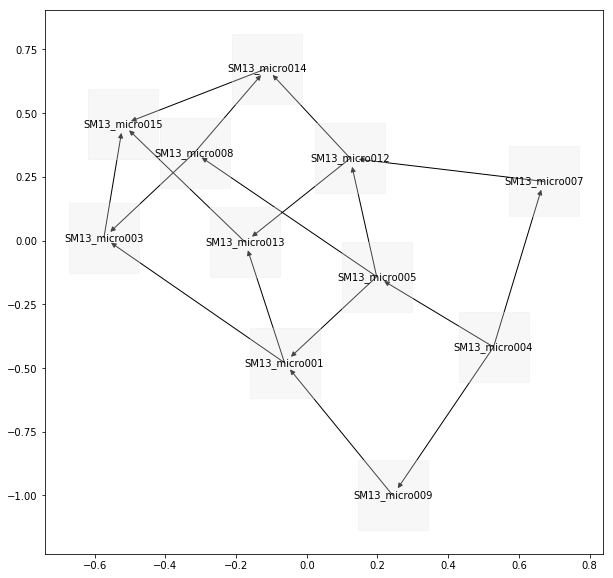

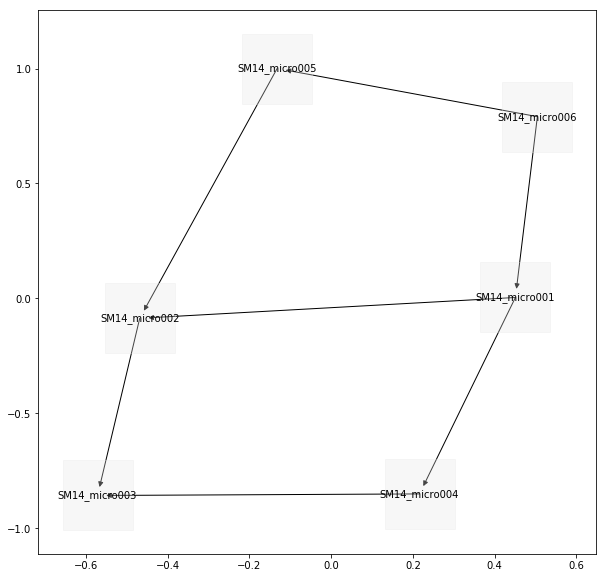

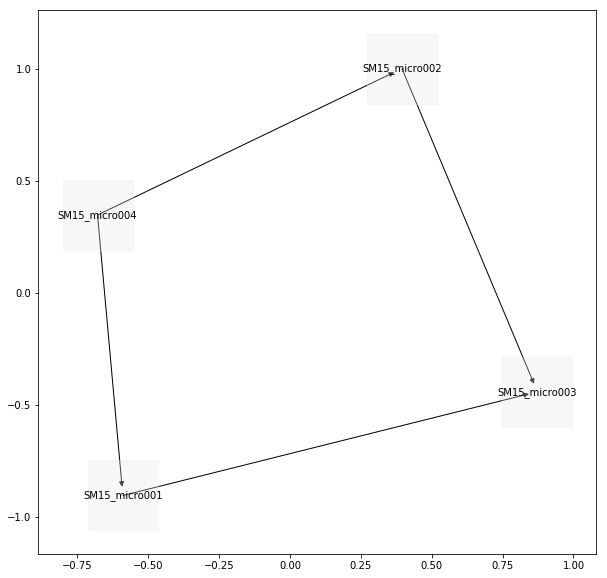

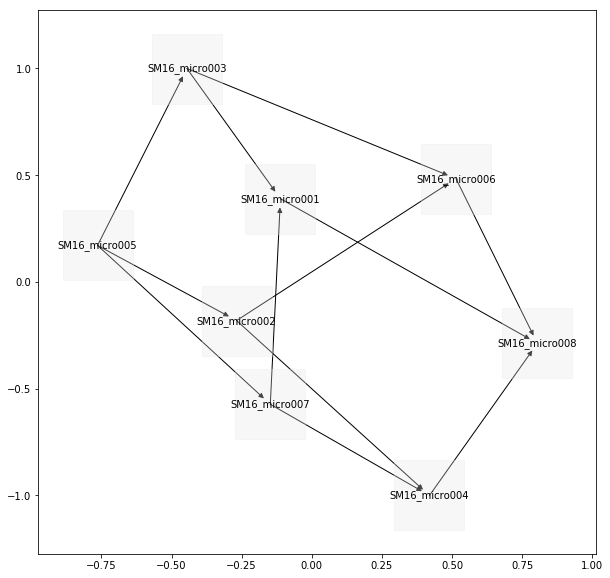

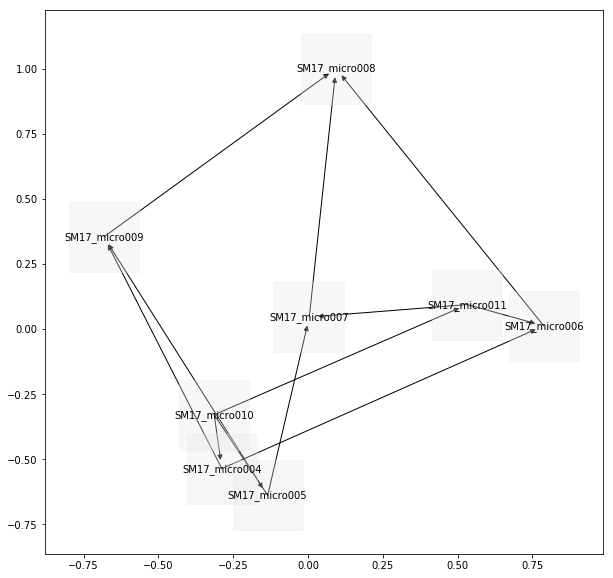

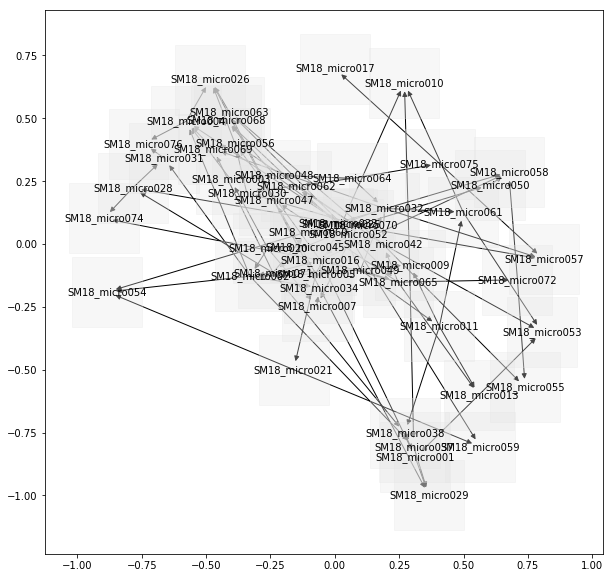

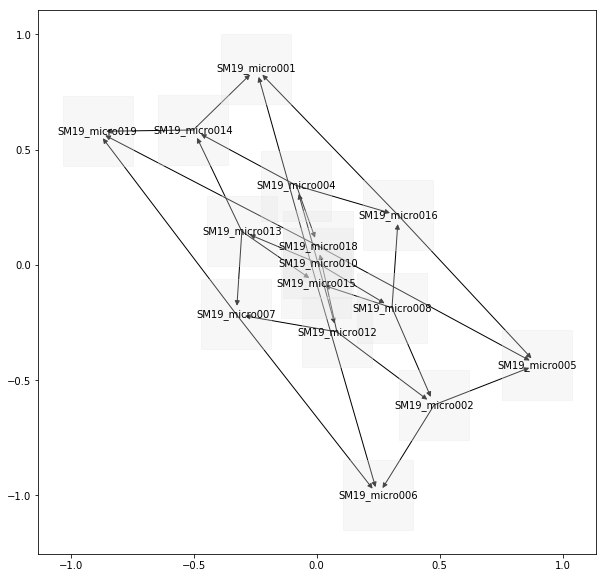

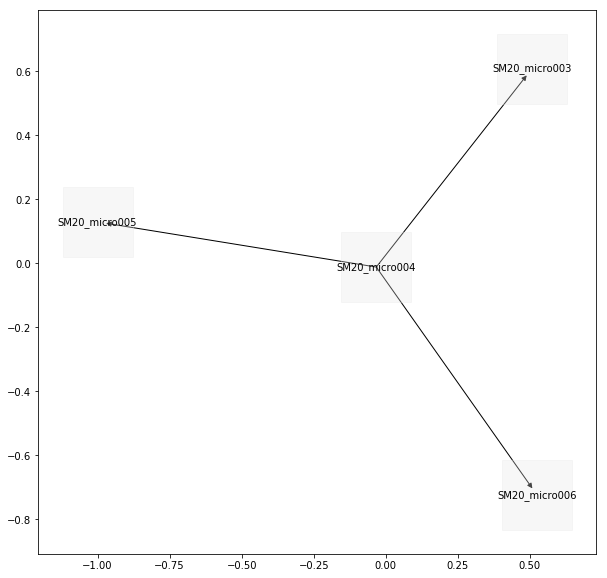

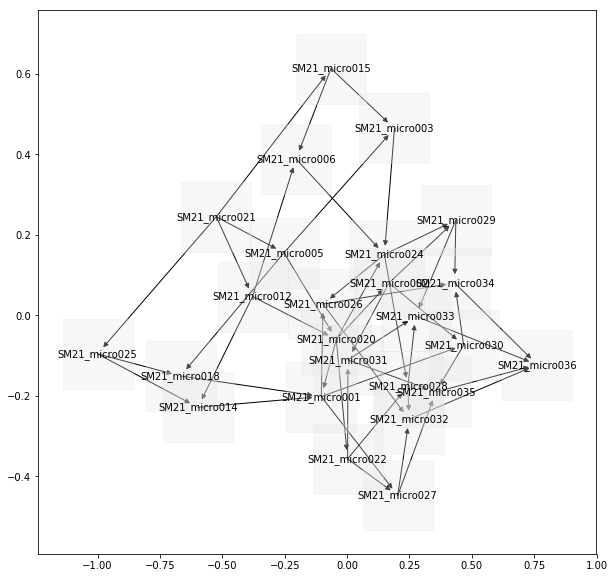

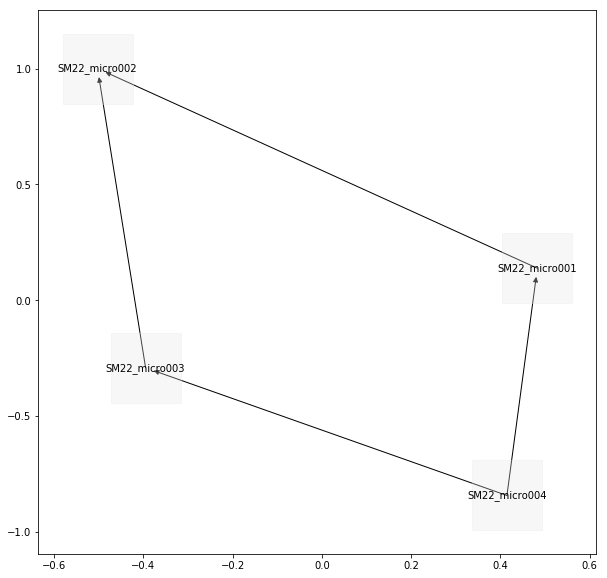

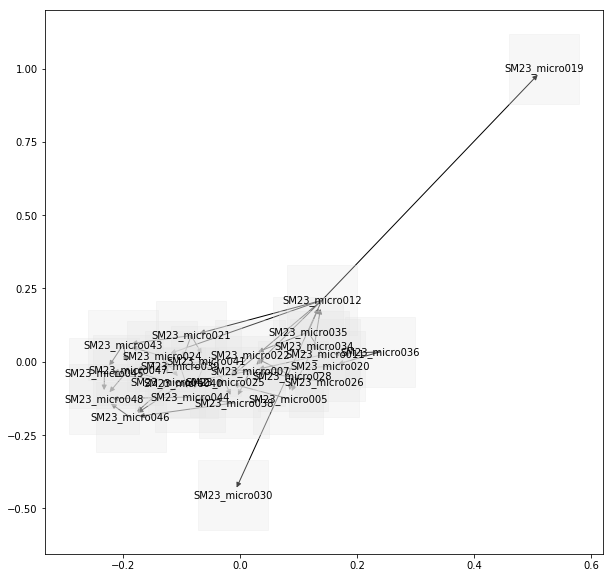

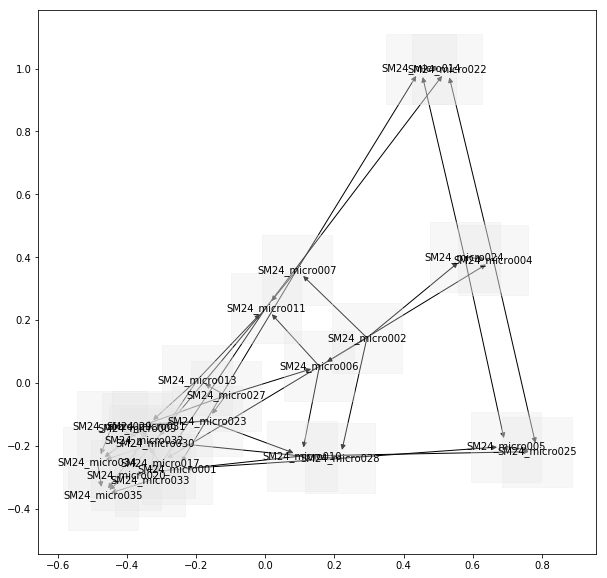

In [13]:
for molnum in range(1,25):
    G = make_graph_plot("SM{:02d}".format(molnum))
    nx.readwrite.write_graphml(G, "SM{:02d}.graphml".format(molnum))
